# 1.4.4 - Optimisation

## Optimisation TPESampler

### Objectifs

1. Analyser les meilleurs configurations sur le système TPESampler
2. Définir des systèmes similaires sur du RandomSampler

In [64]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pandas
import optuna

In [65]:
study = optuna.study.load_study(
    "latin-lemma-optimization",
    "sqlite:///1.4.4 - Modele choice/1.lemma.TPESampler.db"
)
print(study.best_params)
study_df = study.trials_dataframe()
study_df
study_df = study_df.drop("number", axis=1)


{'cemb_dim': 575, 'cemb_layers': 2, 'cemb_type': 'rnn', 'dropout': 0.22857868226737219, 'hidden_size': 384, 'linear_layers': 2, 'lr': 0.00017927281034732222, 'lr_factor': 0.563364250332081, 'lr_patience': 8, 'num_layers': 3, 'patience': 11, 'word_dropout': 0.42818156675566943}


### Matrice de correlation

Given that the samples are not representative and tried to fit a curve, I would believe it's not important

/home/thibault/dev/these/these_env/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



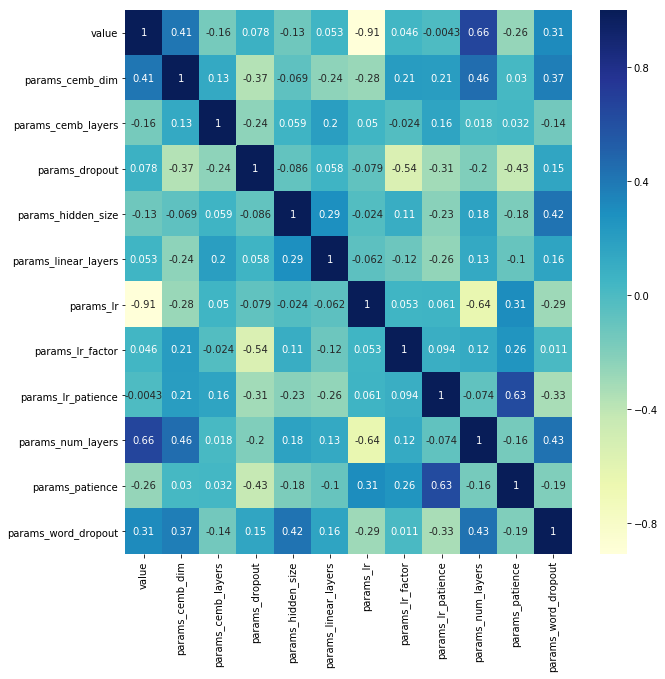

In [66]:
corr = study_df[study_df.state == "COMPLETE"].corr()
corr.to_csv("1.4.4 - Modele choice/correl.csv")

fig, ax = plt.subplots(figsize=(10,10))  
sn.heatmap(corr, annot=True, ax=ax, cmap="YlGnBu")
fig.show()

### Unperfect visualization of results

/home/thibault/dev/these/these_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



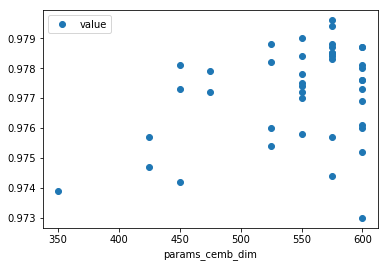

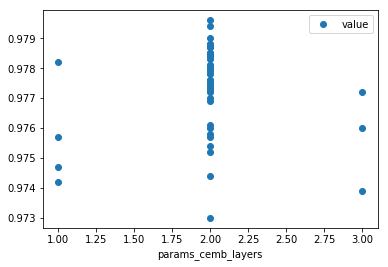

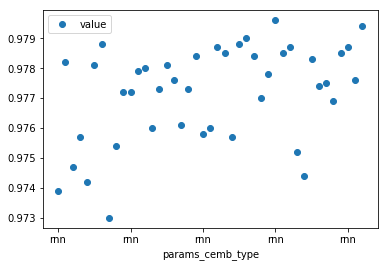

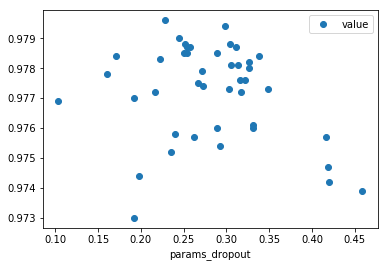

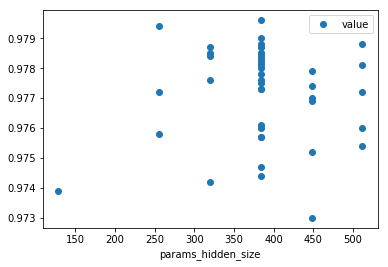

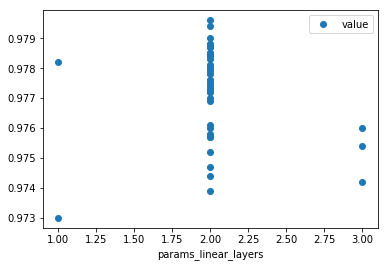

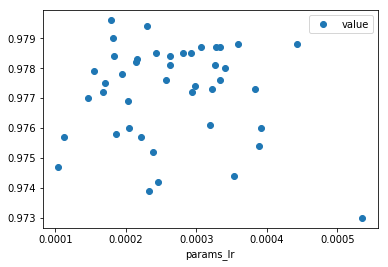

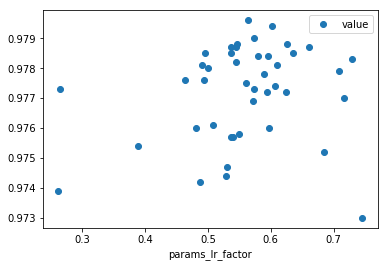

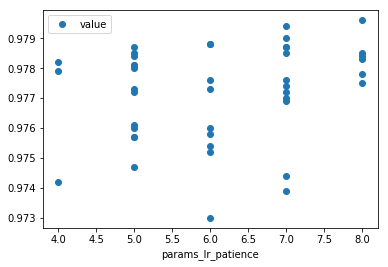

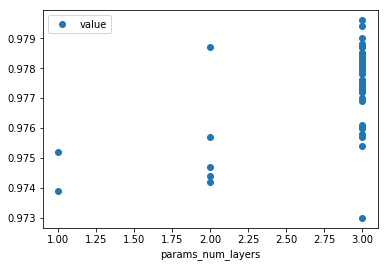

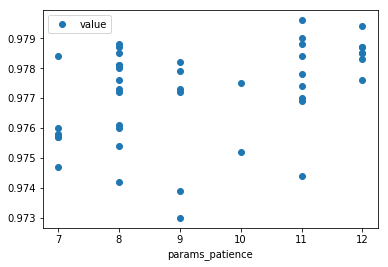

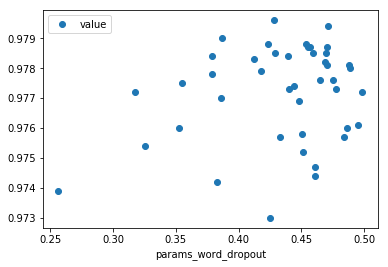

In [67]:
for col in study_df.columns:
    if col.startswith("params_"):
        ax = study_df[study_df.value > 0.95][study_df.state == "COMPLETE"].plot(x=col, y='value', style='o')
        

### Pairs of parameters:

In [68]:
sub_df = study_df[study_df.value > 0.95][study_df.state == "COMPLETE"]
def plot_pair(col_x, col_y):
    x = sub_df["params_"+col_x].array
    y = sub_df["params_"+col_y].array
    z = sub_df.value.array

    color_map = {}
    nx, ny = sorted(list(set(x))), sorted(list(set(y)))
    data = {}
    for x in nx:
        data[x] = {}
        for y in ny:
            m = sub_df[sub_df.params_lr_patience == x][sub_df.params_patience==y].value
            if not m.empty:
                data[x][y] = m.mean()
        if not data[x]:
            del data[x]

    for_heat = pandas.DataFrame(data)

    fig, ax = plt.subplots(figsize=(10,10))  
    ax = sn.heatmap(for_heat, cmap="YlGnBu", ax=ax)
    ax.set_title(f"Average accuracy based on {col_x}/{col_y} couples")
    ax.set_ylabel(col_y)
    ax.set_xlabel(col_x)
    fig.show()

/home/thibault/dev/these/these_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



#### lr_patience / patience

/home/thibault/dev/these/these_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



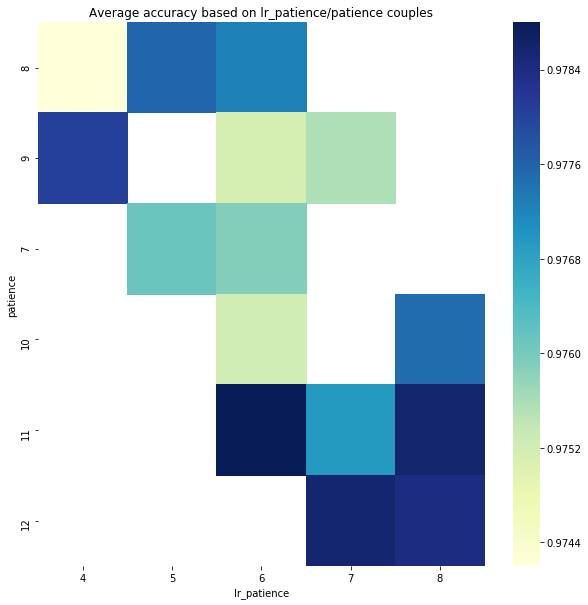

In [69]:
plot_pair("lr_patience", "patience")

### Check test results

In [70]:
with open("1.4.4 - Modele choice/1.lemma.TPESampler.log") as f:
    models = []
    running = False
    for line in f:
        if "::: Evaluation report for task: lemma :::" in line:
            models.append([])
            running = True
        elif "::: Evaluation report for task: pos :::" in line:
            running = False
        elif running:
            models[-1].append(line)

accuracies = [
    row[2].strip().replace("accuracy: ", "") for row in models
]

filenames = """models/OptimizedModel-Latin-Lemma/checkpoint-0-lemma-2020_07_01-11_46_29.tar
models/OptimizedModel-Latin-Lemma/checkpoint-0-lemma-2020_07_01-16_58_47.tar
models/OptimizedModel-Latin-Lemma/checkpoint-0-lemma-2020_07_03-12_47_43.tar
models/OptimizedModel-Latin-Lemma/checkpoint-10-lemma-2020_07_04-08_05_21.tar
models/OptimizedModel-Latin-Lemma/checkpoint-11-lemma-2020_07_04-10_35_58.tar
models/OptimizedModel-Latin-Lemma/checkpoint-13-lemma-2020_07_02-23_24_46.tar
models/OptimizedModel-Latin-Lemma/checkpoint-13-lemma-2020_07_04-13_32_36.tar
models/OptimizedModel-Latin-Lemma/checkpoint-14-lemma-2020_07_04-18_16_27.tar
models/OptimizedModel-Latin-Lemma/checkpoint-15-lemma-2020_07_03-03_07_18.tar
models/OptimizedModel-Latin-Lemma/checkpoint-15-lemma-2020_07_05-01_14_01.tar
models/OptimizedModel-Latin-Lemma/checkpoint-16-lemma-2020_07_05-04_39_30.tar
models/OptimizedModel-Latin-Lemma/checkpoint-17-lemma-2020_07_03-08_24_50.tar
models/OptimizedModel-Latin-Lemma/checkpoint-17-lemma-2020_07_05-09_06_16.tar
models/OptimizedModel-Latin-Lemma/checkpoint-18-lemma-2020_07_05-15_44_52.tar
models/OptimizedModel-Latin-Lemma/checkpoint-1-lemma-2020_07_01-20_27_02.tar
models/OptimizedModel-Latin-Lemma/checkpoint-1-lemma-2020_07_03-16_26_00.tar
models/OptimizedModel-Latin-Lemma/checkpoint-21-lemma-2020_07_06-00_17_12.tar
models/OptimizedModel-Latin-Lemma/checkpoint-23-lemma-2020_07_06-05_49_35.tar
models/OptimizedModel-Latin-Lemma/checkpoint-24-lemma-2020_07_06-11_02_22.tar
models/OptimizedModel-Latin-Lemma/checkpoint-25-lemma-2020_07_06-15_10_54.tar
models/OptimizedModel-Latin-Lemma/checkpoint-28-lemma-2020_07_06-21_44_28.tar
models/OptimizedModel-Latin-Lemma/checkpoint-2-lemma-2020_07_01-22_50_42.tar
models/OptimizedModel-Latin-Lemma/checkpoint-2-lemma-2020_07_03-20_44_16.tar
models/OptimizedModel-Latin-Lemma/checkpoint-31-lemma-2020_07_07-05_21_25.tar
models/OptimizedModel-Latin-Lemma/checkpoint-32-lemma-2020_07_07-10_34_05.tar
models/OptimizedModel-Latin-Lemma/checkpoint-3-lemma-2020_07_02-01_36_12.tar
models/OptimizedModel-Latin-Lemma/checkpoint-3-lemma-2020_07_03-23_30_22.tar
models/OptimizedModel-Latin-Lemma/checkpoint-41-lemma-2020_07_07-21_55_38.tar
models/OptimizedModel-Latin-Lemma/checkpoint-42-lemma-2020_07_08-01_21_12.tar
models/OptimizedModel-Latin-Lemma/checkpoint-43-lemma-2020_07_08-06_48_13.tar
models/OptimizedModel-Latin-Lemma/checkpoint-45-lemma-2020_07_08-11_46_29.tar
models/OptimizedModel-Latin-Lemma/checkpoint-4-lemma-2020_07_02-04_51_55.tar
models/OptimizedModel-Latin-Lemma/checkpoint-4-lemma-2020_07_04-02_52_25.tar
models/OptimizedModel-Latin-Lemma/checkpoint-51-lemma-2020_07_08-20_14_58.tar
models/OptimizedModel-Latin-Lemma/checkpoint-52-lemma-2020_07_09-02_31_46.tar
models/OptimizedModel-Latin-Lemma/checkpoint-53-lemma-2020_07_09-06_39_01.tar
models/OptimizedModel-Latin-Lemma/checkpoint-54-lemma-2020_07_09-10_06_43.tar
models/OptimizedModel-Latin-Lemma/checkpoint-55-lemma-2020_07_09-16_22_22.tar
models/OptimizedModel-Latin-Lemma/checkpoint-57-lemma-2020_07_09-23_56_31.tar
models/OptimizedModel-Latin-Lemma/checkpoint-58-lemma-2020_07_10-04_16_11.tar
models/OptimizedModel-Latin-Lemma/checkpoint-5-lemma-2020_07_02-07_03_10.tar
models/OptimizedModel-Latin-Lemma/checkpoint-5-lemma-2020_07_04-03_30_33.tar
models/OptimizedModel-Latin-Lemma/checkpoint-60-lemma-2020_07_10-09_45_30.tar
models/OptimizedModel-Latin-Lemma/checkpoint-61-lemma-2020_07_10-15_24_13.tar
models/OptimizedModel-Latin-Lemma/checkpoint-65-lemma-2020_07_13-22_08_56.tar
models/OptimizedModel-Latin-Lemma/checkpoint-67-lemma-2020_07_14-05_17_45.tar
models/OptimizedModel-Latin-Lemma/checkpoint-69-lemma-2020_07_14-11_27_04.tar
models/OptimizedModel-Latin-Lemma/checkpoint-6-lemma-2020_07_02-10_31_41.tar
models/OptimizedModel-Latin-Lemma/checkpoint-70-lemma-2020_07_14-15_21_04.tar
models/OptimizedModel-Latin-Lemma/checkpoint-72-lemma-2020_07_14-17_35_13.tar
models/OptimizedModel-Latin-Lemma/checkpoint-73-lemma-2020_07_14-20_37_07.tar
models/OptimizedModel-Latin-Lemma/checkpoint-76-lemma-2020_07_15-04_16_09.tar
models/OptimizedModel-Latin-Lemma/checkpoint-77-lemma-2020_07_15-09_54_51.tar
models/OptimizedModel-Latin-Lemma/checkpoint-7-lemma-2020_07_04-04_16_20.tar
models/OptimizedModel-Latin-Lemma/checkpoint-86-lemma-2020_07_16-00_31_21.tar
models/OptimizedModel-Latin-Lemma/checkpoint-87-lemma-2020_07_16-05_01_44.tar
models/OptimizedModel-Latin-Lemma/checkpoint-88-lemma-2020_07_16-10_36_02.tar
models/OptimizedModel-Latin-Lemma/checkpoint-90-lemma-2020_07_16-20_29_48.tar
models/OptimizedModel-Latin-Lemma/checkpoint-91-lemma-2020_07_17-01_37_55.tar
models/OptimizedModel-Latin-Lemma/checkpoint-93-lemma-2020_07_17-07_23_28.tar
models/OptimizedModel-Latin-Lemma/checkpoint-9-lemma-2020_07_04-05_32_06.tar""".split()

numbers = [
    fn.split("-")[3] for fn in filenames
]
scores = dict(zip(numbers, accuracies))
scores

{'0': '0.9116',
 '10': '0.9739',
 '11': '0.9735',
 '13': '0.9736',
 '14': '0.9764',
 '15': '0.9768',
 '16': '0.9718',
 '17': '0.9746',
 '18': '0.9754',
 '1': '0.9374',
 '21': '0.9758',
 '23': '0.9766',
 '24': '0.9752',
 '25': '0.9747',
 '28': '0.9763',
 '2': '0.9712',
 '31': '0.9771',
 '32': '0.9763',
 '3': '0.9497',
 '41': '0.9744',
 '42': '0.976',
 '43': '0.9771',
 '45': '0.9743',
 '4': '0.9762',
 '51': '0.9747',
 '52': '0.9782',
 '53': '0.9774',
 '54': '0.9734',
 '55': '0.9765',
 '57': '0.9777',
 '58': '0.9763',
 '5': '0.0',
 '60': '0.9755',
 '61': '0.9765',
 '65': '0.9774',
 '67': '0.9778',
 '69': '0.9767',
 '6': '0.9733',
 '70': '0.9736',
 '72': '0.0',
 '73': '0.9728',
 '76': '0.9765',
 '77': '0.9764',
 '7': '0.721',
 '86': '0.9758',
 '87': '0.9745',
 '88': '0.9779',
 '90': '0.9774',
 '91': '0.9763',
 '93': '0.9766',
 '9': '0.0'}

### Learning curves

In [71]:
import optuna.visualization


optuna.visualization.plot_intermediate_values(study)

### Opimization History

In [72]:
optuna.visualization.plot_optimization_history(study)

### Param importance

In [73]:
optuna.visualization.plot_param_importances(study)

/home/thibault/dev/these/these_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v1.5.0). The interface can change in the future.



### Parallel

In [74]:
fig = optuna.visualization.plot_parallel_coordinate(study, params=["lr", "lr_factor", "lr_patience", "patience"])
fig

## Optimisation par Random Sampler

In [75]:
study_rdm = optuna.study.load_study(
    "latin-lemma-optimization-random",
    "sqlite:///1.4.4 - Modele choice/2.lemma.random.db"
)

### Learning

In [76]:
optuna.visualization.plot_intermediate_values(study_rdm)

### History

In [77]:
optuna.visualization.plot_optimization_history(study_rdm)

### Importance

In [78]:
optuna.visualization.plot_param_importances(study_rdm)

/home/thibault/dev/these/these_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v1.5.0). The interface can change in the future.



### Parallel

In [79]:
optuna.visualization.plot_parallel_coordinate(study_rdm)

## Training time

96 50
31 11
31 11
                   Durée
Étape Statut            
1     Complète        50
      Interrompue     44
2     Complète        11
      Interrompue     19
3     Complète        11
      Interrompue     10
416.63638888888886


[Text(0.5,0,'')]

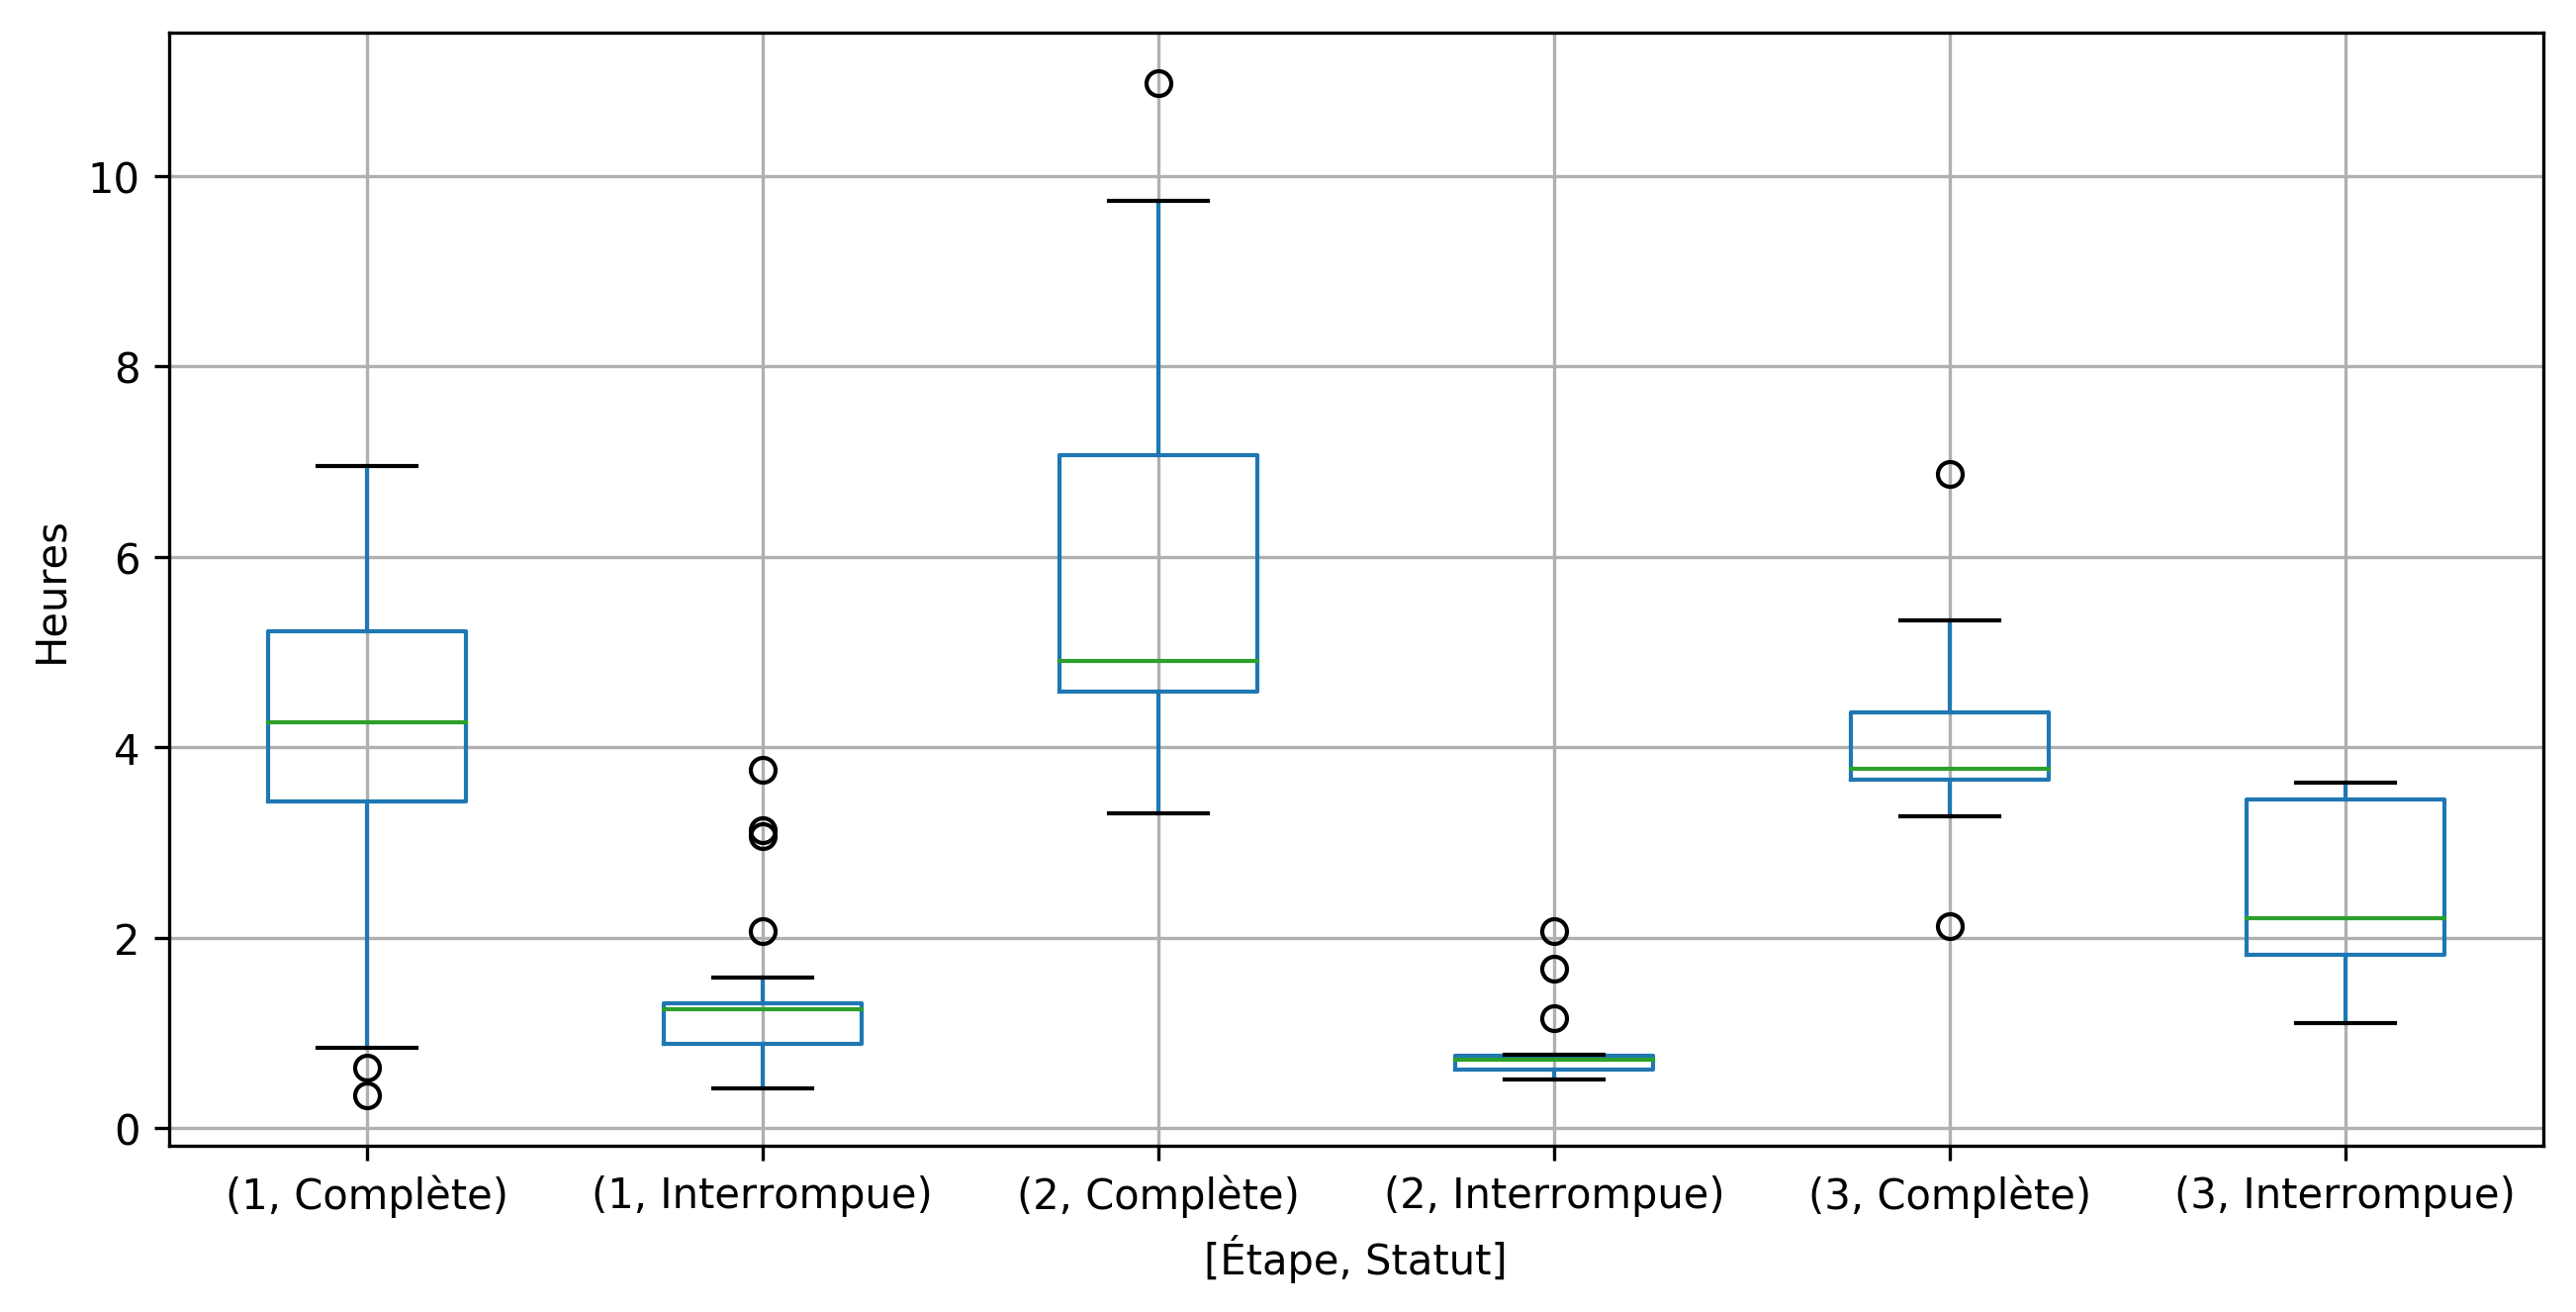

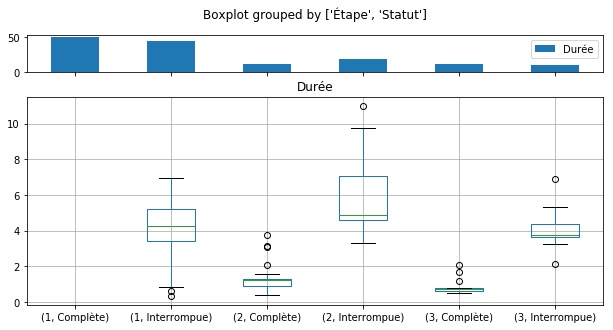

In [112]:
study_rdm_df = study_rdm.trials_dataframe()
#print(study_rdm_df[study_rdm_df["state"] == "COMPLETE"])

study_hid_df = optuna.study.load_study(
    "latin-lemma-optimization-hidden",
    "sqlite:///1.4.4 - Modele choice/lemma2.db"
).trials_dataframe()

data = []
for etape, df in enumerate([study_df, study_rdm_df, study_hid_df]):
    for x in (df[df["state"] == "COMPLETE"].duration.astype('timedelta64[s]') / (60*60)):
        data.append({"Étape": etape+1, "Durée": x, "Statut": "Complète"})
    for x in (df[df["state"] == "PRUNED"].duration.astype('timedelta64[s]') / (60*60)):
        data.append({"Étape": etape+1, "Durée": x, "Statut": "Interrompue"})


from pandas import DataFrame

df = DataFrame(data)
ax = df.boxplot(column="Durée", by=["Étape", "Statut"], figsize=(10,5))
fig = ax.get_figure()
fig.set_dpi(300)
fig.suptitle("")
ax.set_title("")
ax.set_ylabel("Heures")

print(len(study_df), len(study_df[study_df["state"] == "COMPLETE"]))
print(len(study_rdm_df), len(study_rdm_df[study_rdm_df["state"] == "COMPLETE"]))
print(len(study_rdm_df), len(study_hid_df[study_hid_df["state"] == "COMPLETE"]))

print(df.groupby(["Étape", "Statut"]).count())
print(df["Durée"].sum())

import seaborn as sns
import matplotlib.pyplot as plt
 
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, figsize=(10,5), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
ax_box = df.boxplot(column="Durée", by=["Étape", "Statut"], ax=ax_box)
ax_hist = df.groupby(["Étape", "Statut"]).count().plot.bar(ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
#print(len(study_df))
#print(study_df)